In [1]:
# Import required libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import nltk

## Tamil dataset

### Load data (train/validation/test) from csv files

In [2]:
# Loading data from Dataset folder
tamil_train = pd.read_csv('Dataset/tamil_hope_first_train.csv')
tamil_validation = pd.read_csv('Dataset/tamil_hope_first_dev.csv')
tamil_test = pd.read_csv('Dataset/tamil_goldlabels.csv')

### View sample records from train/validation/test data

In [3]:
tamil_train.sample(5)

,text,label
11657,ஷ வயலூர் ரே,Non_hope_speech
2749,Ellathayum uninstall pananum bro kandipa..naa ...,Non_hope_speech
3151,Ella namma data than avanukku iphone aa marrir...,not-Tamil
3594,@Kumar Kumar me toooooo ‍,Non_hope_speech
6738,Wish you happy birthday to you maaaaa,Hope_speech


In [4]:
tamil_validation.sample(5)

,text,label
82,China ku aapu punda dhan bro,Non_hope_speech
812,சில விடுகளில் சானம் கோமியம் மற்றும் உடல் தூக்க...,Hope_speech
1957,We need made in india,not-Tamil
721,Bothi dharmar thaan varanum,Non_hope_speech
1255,bro bharat biotech kandhu pidicha CORONA VACCI...,Hope_speech


In [5]:
tamil_test.sample(5)

,text,label
1069,Samsung lovers just like HIT,Hope_speech
302,first mi phone ya olikanum,Non_hope_speech
1529,MG squad hi anna,Non_hope_speech
1618,பொன்னுங்க நூடுல்ஸ் சாப்டாம இருங்க போதும்,Non_hope_speech
130,இன்னும் சமுதாய தோற்று ஆகல.. அப்படித்தான,Non_hope_speech


In [6]:
tamil_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16160 non-null  object
 1   label   16160 non-null  object
dtypes: object(2)
memory usage: 252.6+ KB


In [7]:
tamil_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2018 non-null   object
 1   label   2018 non-null   object
dtypes: object(2)
memory usage: 31.7+ KB


In [8]:
tamil_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2020 entries, 0 to 2019
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2020 non-null   object
 1   label   2020 non-null   object
dtypes: object(2)
memory usage: 31.7+ KB


### Get label counts for train/validation/test data and visualize

In [9]:
label_counts_train = tamil_train['label'].value_counts()
label_counts_valid = tamil_validation['label'].value_counts()
label_counts_test = tamil_test['label'].value_counts()
print(label_counts_train)
print(label_counts_valid)
print(label_counts_test)

Non_hope_speech    7872
Hope_speech        6327
not-Tamil          1961
Name: label, dtype: int64
Non_hope_speech    998
Hope_speech        757
not-Tamil          263
Name: label, dtype: int64
Non_hope_speech    946
Hope_speech        815
not-Tamil          259
Name: label, dtype: int64


In [10]:
norm_label_counts_train = tamil_train['label'].value_counts(normalize=True)
norm_label_counts_valid = tamil_validation['label'].value_counts(normalize=True)
norm_label_counts_test = tamil_test['label'].value_counts(normalize=True)
print(norm_label_counts_train)
print(norm_label_counts_valid)
print(norm_label_counts_test)

Non_hope_speech    0.487129
Hope_speech        0.391522
not-Tamil          0.121349
Name: label, dtype: float64
Non_hope_speech    0.494549
Hope_speech        0.375124
not-Tamil          0.130327
Name: label, dtype: float64
Non_hope_speech    0.468317
Hope_speech        0.403465
not-Tamil          0.128218
Name: label, dtype: float64


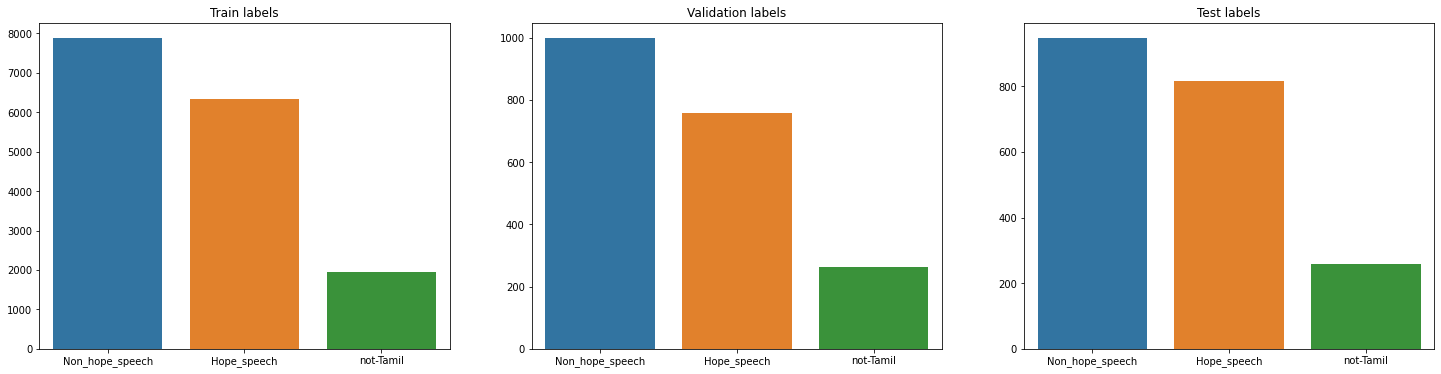

In [11]:
fig = plt.figure(figsize=(25,6))
fig.subplots(1, 3, squeeze=False)
plt.subplot(1,3,1)
sns.barplot(x=label_counts_train.index, y=label_counts_train.values)
plt.title('Train labels')
plt.subplot(1,3,2)
sns.barplot(x=label_counts_valid.index, y=label_counts_valid.values)
plt.title('Validation labels')
plt.subplot(1,3,3)
sns.barplot(x=label_counts_test.index, y=label_counts_test.values)
plt.title('Test labels')
plt.show()

- We can observe that there is a class imbalance across the target labels
- The ratio of the target labels are almost similar across train/test/validation datasets

### Get the word count for each text and visualize

In [12]:
tamil_train["WordCount"] = tamil_train["text"].str.split().apply(len)
tamil_validation["WordCount"] = tamil_validation["text"].str.split().apply(len)
tamil_test["WordCount"] = tamil_test["text"].str.split().apply(len)

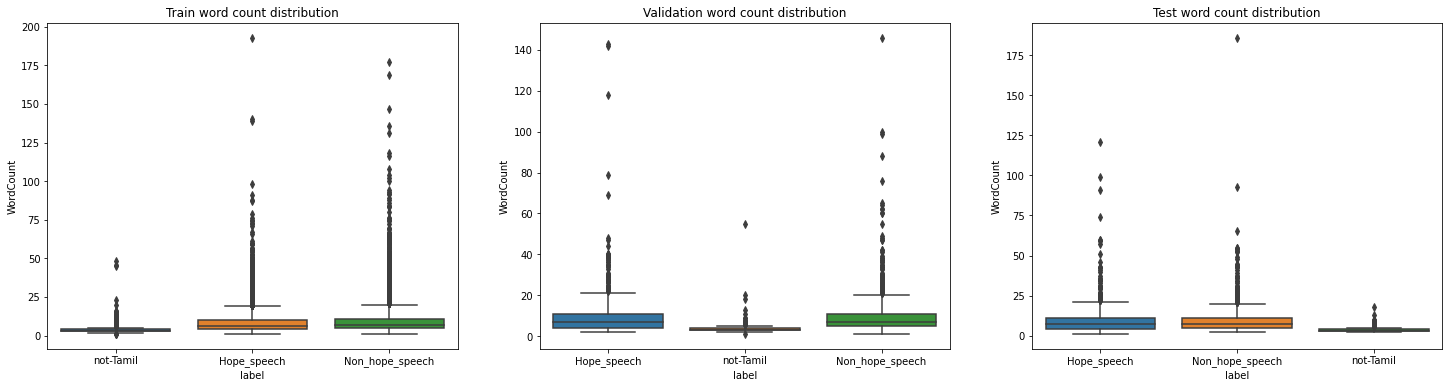

In [13]:
fig = plt.figure(figsize=(25,6))
fig.subplots(1, 3, squeeze=False)
plt.subplot(1,3,1)
sns.boxplot(data=tamil_train, x='label', y='WordCount')
plt.title('Train word count distribution')
plt.subplot(1,3,2)
sns.boxplot(data=tamil_validation, x='label', y='WordCount')
plt.title('Validation word count distribution')
plt.subplot(1,3,3)
sns.boxplot(data=tamil_test, x='label', y='WordCount')
plt.title('Test word count distribution')
plt.show()

- We can observe that most of the texts are less than 100 words barring a few outliers in the range of 100-190
- 'Not-tamil' texts are usually short (<50 words) compared to other two labels

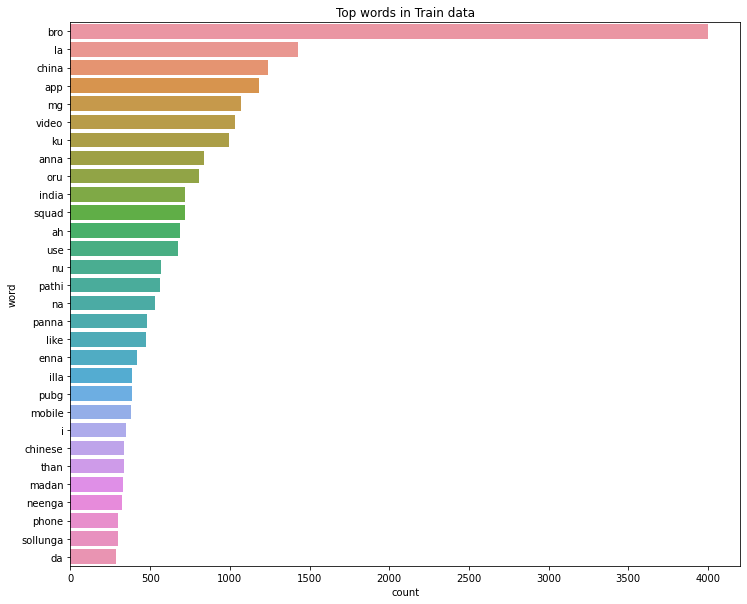

In [14]:
train_texts = tamil_train['text']
train_texts_str = ' '.join(train_texts)
train_tokens = train_texts_str.split(' ')
train_vocabulary = [w.lower() for w in train_tokens if w.isalpha()]
val_count=Counter(train_vocabulary)
# the top 30 occuring words in the text
top_30 = val_count.most_common(30)
top_30_df = pd.DataFrame(top_30, columns=['word', 'count'])
plt.figure(figsize=(12,10))
sns.barplot(y="word", x="count", data=top_30_df)
plt.title('Top words in Train data')
plt.show()

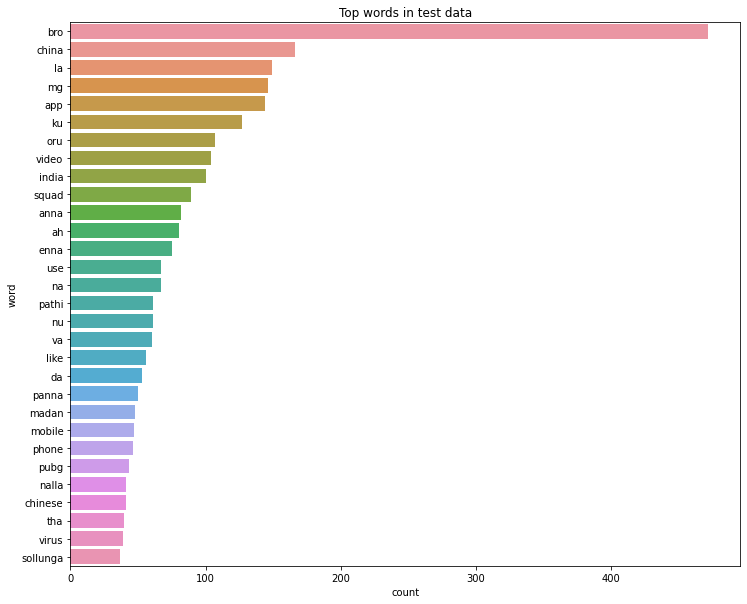

In [15]:
test_texts = tamil_test['text']
test_texts_str = ' '.join(test_texts)
test_tokens = test_texts_str.split(' ')
test_vocabulary = [w.lower() for w in test_tokens if w.isalpha()]
val_count=Counter(test_vocabulary)
# the top 30 occuring words in the text
top_30 = val_count.most_common(30)
top_30_df = pd.DataFrame(top_30, columns=['word', 'count'])
plt.figure(figsize=(12,10))
sns.barplot(y="word", x="count", data=top_30_df)
plt.title('Top words in test data')
plt.show()

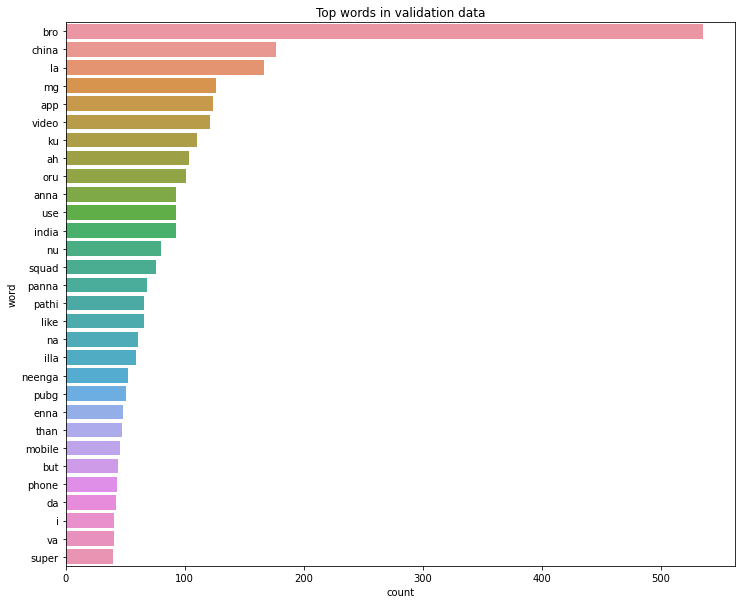

In [16]:
valid_texts = tamil_validation['text']
valid_texts_str = ' '.join(valid_texts)
valid_tokens = valid_texts_str.split(' ')
valid_vocabulary = [w.lower() for w in valid_tokens if w.isalpha()]
val_count=Counter(valid_vocabulary)
# the top 30 occuring words in the text
top_30 = val_count.most_common(30)
top_30_df = pd.DataFrame(top_30, columns=['word', 'count'])
plt.figure(figsize=(12,10))
sns.barplot(y="word", x="count", data=top_30_df)
plt.title('Top words in validation data')
plt.show()

## Malayalam dataset

### Load data (train/validation/test) from csv files

In [17]:
# Loading data from Dataset folder
mal_train = pd.read_csv('Dataset/malayalam_hope_train.csv')
mal_validation = pd.read_csv('Dataset/malayalam_hope_dev.csv')
mal_test = pd.read_csv('Dataset/malayalam_goldlabels.csv')

### View sample records from train/validation/test data

In [18]:
mal_train.sample(5)

,text,label
4337,Innu pubg delete cheythit video kanunna njan,Non_hope_speech
6063,Apol made in India enn vivo de putiya phonil u...,Non_hope_speech
1228,@surya kiran മനുഷ്യനും മൃഗവും വേറെ വേറയാണ്,Non_hope_speech
6515,@Gadh DQ not all bro,not-malayalam
5862,Tik tok Colony app,Non_hope_speech


In [19]:
mal_validation.sample(5)

,text,label
755,കോട്ടിട്ട പൊട്ടൻ ന്ന് ഒക്കെ കേട്ടിട്ടെ ഉള്ളു ഇ...,Non_hope_speech
490,Kevine aa coatinte Vila kalayan ayit...ninak ...,Non_hope_speech
861,@surya kiran واذا خاطبهم الجاهلون قالوا سلاما,not-malayalam
704,അതെ ഇവർ രണ്ട് നീച ജന്മങ്ങൾ,Non_hope_speech
1059,@Varun Punnala nഎനിക്ക് തോന്നുന്നത് അതും chang...,Non_hope_speech


In [20]:
mal_test.sample(5)

,text,label
943,Vann kzhinnala pinna varanum chance Indo plz r...,Non_hope_speech
944,Super God bless you. Sonu nikuuu,not-Malayalam
529,എന്റെ മക്കൾക്ക് വിവാഹാശംസകൾ നേരുന്നു അതുപോലെ ന...,Hope_speech
378,ദൈവം സഹായിച്ച് എനിക്ക് പുരുഷ ഫോർമോണിന്റെ കുറവൊ...,Non_hope_speech
556,Amma karayanda. Makkalu karanja ammakku sahikk...,Hope_speech


In [21]:
mal_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8564 non-null   object
 1   label   8564 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [22]:
mal_validation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1070 non-null   object
 1   label   1070 non-null   object
dtypes: object(2)
memory usage: 16.8+ KB


In [23]:
mal_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1071 entries, 0 to 1070
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1071 non-null   object
 1   label   1071 non-null   object
dtypes: object(2)
memory usage: 16.9+ KB


### Get label counts for train/validation/test data and visualize

In [24]:
label_counts_train = mal_train['label'].value_counts()
label_counts_valid = mal_validation['label'].value_counts()
label_counts_test = mal_test['label'].value_counts()
print(label_counts_train)
print(label_counts_valid)
print(label_counts_test)

Non_hope_speech    6205
Hope_speech        1668
not-malayalam       691
Name: label, dtype: int64
Non_hope_speech    784
Hope_speech        190
not-malayalam       96
Name: label, dtype: int64
Non_hope_speech    776
Hope_speech        194
not-Malayalam      101
Name: label, dtype: int64


In [25]:
nlabel_counts_train = mal_train['label'].value_counts(normalize=True)
nlabel_counts_valid = mal_validation['label'].value_counts(normalize=True)
nlabel_counts_test = mal_test['label'].value_counts(normalize=True)
print(nlabel_counts_train)
print(nlabel_counts_valid)
print(nlabel_counts_test)

Non_hope_speech    0.724545
Hope_speech        0.194769
not-malayalam      0.080687
Name: label, dtype: float64
Non_hope_speech    0.73271
Hope_speech        0.17757
not-malayalam      0.08972
Name: label, dtype: float64
Non_hope_speech    0.724556
Hope_speech        0.181139
not-Malayalam      0.094304
Name: label, dtype: float64


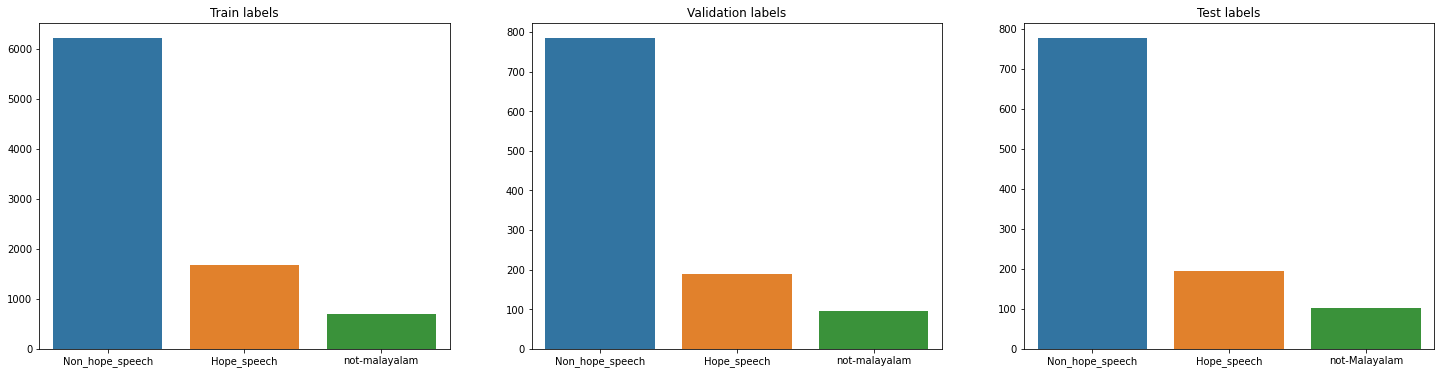

In [26]:
fig = plt.figure(figsize=(25,6))
fig.subplots(1, 3, squeeze=False)
plt.subplot(1,3,1)
sns.barplot(x=label_counts_train.index, y=label_counts_train.values)
plt.title('Train labels')
plt.subplot(1,3,2)
sns.barplot(x=label_counts_valid.index, y=label_counts_valid.values)
plt.title('Validation labels')
plt.subplot(1,3,3)
sns.barplot(x=label_counts_test.index, y=label_counts_test.values)
plt.title('Test labels')
plt.show()

- We can observe that there is a class imbalance across the target labels
- The ratio of the target labels are almost similar across train/test/validation datasets

### Get the word count for each text and visualize

In [27]:
mal_train["WordCount"] = mal_train["text"].str.split().apply(len)
mal_validation["WordCount"] = mal_validation["text"].str.split().apply(len)
mal_test["WordCount"] = mal_test["text"].str.split().apply(len)

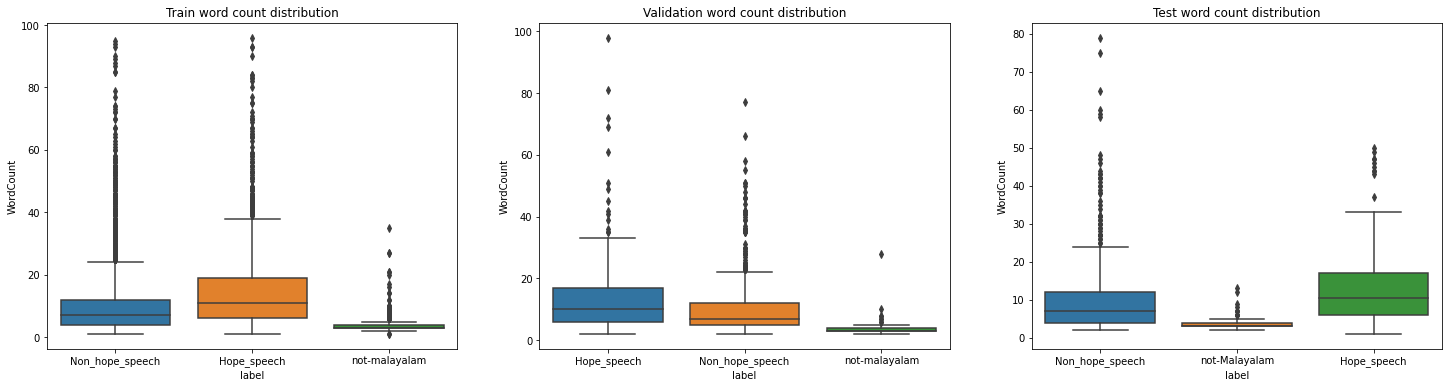

In [28]:
fig = plt.figure(figsize=(25,6))
fig.subplots(1, 3, squeeze=False)
plt.subplot(1,3,1)
sns.boxplot(data=mal_train, x='label', y='WordCount')
plt.title('Train word count distribution')
plt.subplot(1,3,2)
sns.boxplot(data=mal_validation, x='label', y='WordCount')
plt.title('Validation word count distribution')
plt.subplot(1,3,3)
sns.boxplot(data=mal_test, x='label', y='WordCount')
plt.title('Test word count distribution')
plt.show()

- We can observe that max length of the texts is less than 100 words with outliers in the range of 40-100
- 'Not-malayalam' texts are usually short (<40 words) compared to other two labels

## Pre-processing 

In [29]:
#!pip install langdetect
#!pip install google_trans_new
#!pip install demoji
#!pip install advertools
#!pip install indicnlp

In [30]:
from langdetect import detect
from google_trans_new import google_translator
import demoji
#demoji.download_codes()
import advertools as adv

In [31]:
def replace_emoticons(text):
    # Check if emoji is contained in text
    found_emoji = demoji.findall(text)
    if found_emoji:
        for key, value in found_emoji.items():
            text = text.replace(key, value + ' ')
    return text

In [32]:
list_of_stop_words = adv.stopwords['tamil']
def remove_stopwords_tamil(line):
    sent = ''
    for i in line.split():
        if i not in list_of_stop_words:
            sent+=i + " "
    return sent

In [33]:
def remove_stopwords(df, lang):
    list_of_stop_words = adv.stopwords['tamil']
    new_df=pd.DataFrame(columns=['text','label'])
    for index, row in df.iterrows():
        sent = ''
        end = {}
        line=str(row['text'])
        for i in line.split():
            if i not in list_of_stop_words:
                sent+=i + " "
        end['text']=sent
        end['label']=str(row['label'])
        new_df=new_df.append(end,ignore_index=True)
    return new_df

In [34]:
tamil_train['text'] = tamil_train['text'].apply(replace_emoticons)
tamil_validation['text'] = tamil_validation['text'].apply(replace_emoticons)
tamil_test['text'] = tamil_test['text'].apply(replace_emoticons)
mal_train['text'] = mal_train['text'].apply(replace_emoticons)
mal_validation['text'] = mal_validation['text'].apply(replace_emoticons)
mal_test['text'] = mal_test['text'].apply(replace_emoticons)

In [35]:
tamil_train.head()

,text,label,WordCount
0,Realme india product,not-Tamil,3
1,I also don't have tiktok hello and allnBut I'm...,Hope_speech,11
2,Thalaivare..neengale inum one plus mobile vach...,Non_hope_speech,7
3,Annee varanda thondai.. corona virus affect pa...,Hope_speech,16
4,5views but 18likes,Non_hope_speech,3


In [36]:
tamil_train['text'] = tamil_train['text'].apply(remove_stopwords_tamil)
tamil_validation['text'] = tamil_validation['text'].apply(remove_stopwords_tamil)
tamil_test['text'] = tamil_test['text'].apply(remove_stopwords_tamil)

In [37]:
from indicnlp.normalize.indic_normalize import IndicNormalizerFactory

In [38]:
def normalize_tamil(input_text):
    remove_nuktas=False
    factory=IndicNormalizerFactory()
    normalizer=factory.get_normalizer('ta', remove_nuktas=True)
    return normalizer.normalize(input_text)

In [39]:
def normalize_mal(input_text):
    remove_nuktas=False
    factory=IndicNormalizerFactory()
    normalizer=factory.get_normalizer('ml', remove_nuktas=True)
    return normalizer.normalize(input_text)

In [40]:
tamil_train['text'] = tamil_train['text'].apply(normalize_tamil)
tamil_validation['text'] = tamil_validation['text'].apply(normalize_tamil)
tamil_test['text'] = tamil_test['text'].apply(normalize_tamil)

In [41]:
mal_train['text'] = mal_train['text'].apply(normalize_mal)
mal_validation['text'] = mal_validation['text'].apply(normalize_mal)
mal_test['text'] = mal_test['text'].apply(normalize_mal)

### Write the pre-processed output as csv files

In [44]:
tamil_train.drop(columns=['WordCount'], inplace=True)
tamil_validation.drop(columns=['WordCount'], inplace=True)
tamil_test.drop(columns=['WordCount'], inplace=True)
mal_train.drop(columns=['WordCount'], inplace=True)
mal_validation.drop(columns=['WordCount'], inplace=True)
mal_test.drop(columns=['WordCount'], inplace=True)

In [53]:
mal_train['label'].unique()

array(['Non_hope_speech', 'Hope_speech', 'not-malayalam'], dtype=object)

In [54]:
mal_test['label'].unique()

array(['Non_hope_speech', 'not-Malayalam', 'Hope_speech'], dtype=object)

In [55]:
mal_train['label'] = mal_train['label'].replace(['not-malayalam'], 'not-Malayalam')
mal_validation['label'] = mal_validation['label'].replace(['not-malayalam'], 'not-Malayalam')

In [56]:
mal_train['label'].unique()

array(['Non_hope_speech', 'Hope_speech', 'not-Malayalam'], dtype=object)

In [ ]:
tamil_train.to_csv('Dataset/preprocessed_hope_edi_tamil_train.csv', index=False)
tamil_validation.to_csv('Dataset/preprocessed_hope_edi_tamil_valid.csv', index=False)
tamil_test.to_csv('Dataset/preprocessed_hope_edi_tamil_test.csv', index=False)

In [57]:
mal_train.to_csv('Dataset/preprocessed_hope_edi_mal_train.csv', index=False)
mal_validation.to_csv('Dataset/preprocessed_hope_edi_mal_valid.csv', index=False)
mal_test.to_csv('Dataset/preprocessed_hope_edi_mal_test.csv', index=False)